In [1]:
import torch
import numpy as np

In [2]:
torch.randn(1)

tensor([-0.0983])

In [70]:
# Define a weight and bias
weight = 0.7
bias = 0.1

x = torch.arange(10).float()
print(x)
print(x.shape)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
torch.Size([10])


In [71]:
y = weight * x + bias
y

tensor([0.1000, 0.8000, 1.5000, 2.2000, 2.9000, 3.6000, 4.3000, 5.0000, 5.7000,
        6.4000])

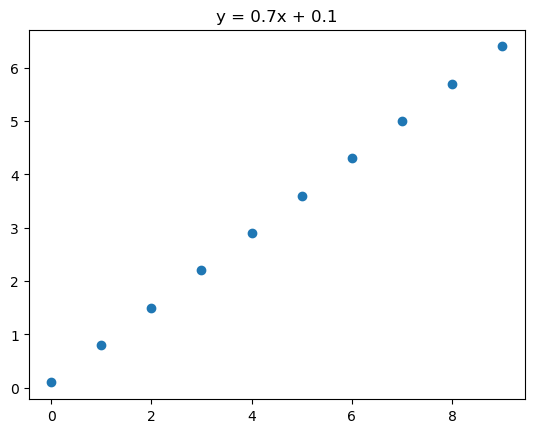

In [72]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.title("y = 0.7x + 0.1")
plt.show()

In [76]:
X_train , X_test = x[:8], x[8:]
y_train , y_test = y[:8], y[8:]
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  torch.Size([8])
X_test shape:  torch.Size([2])
y_train shape:  torch.Size([8])
y_test shape:  torch.Size([2])


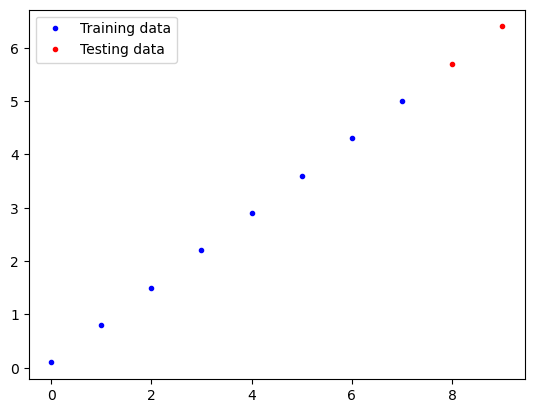

In [77]:
# Plot the training data and test data
plt.plot(X_train, y_train, '.', label='Training data',color='blue')
plt.plot(X_test, y_test, '.', label='Testing data',color='red')
plt.legend()
plt.show()


In [78]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # weight value initailation
        self.weight = nn.Parameter(torch.randn(1),
                                   requires_grad=True)

        # bias value initailation
        self.bias = nn.Parameter(torch.randn(1),
                                 requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias



In [79]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [80]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [81]:
# Define the loss function
loss_fn = nn.L1Loss()

# Define the optimizer

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [82]:
# Set the random seed for reproducibility(`torch.manual_seed(42)`)
torch.manual_seed(42)

train_loss = []
test_loss = []
epoch_count = []

epochs = 100

for epoch in range(epochs):

    # Training
    model_0.train()

    # Forward pass
    y_train_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_fn(y_train_pred, y_train)

    # Zero all the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

    with torch.inference_mode():
        # Test
        model_0.eval()

        # Forward pass
        y_test_pred = model_0(X_test)

        # Calculate the loss
        test_loss.append(loss_fn(y_test_pred, y_test).item())
        train_loss.append(loss.item())
        epoch_count.append(epoch)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss: {loss.item()}, Testing loss: {test_loss[-1]}")
        print(f"Model weight: {model_0.weight.item()}, Model bias: {model_0.bias.item()}")
        print("\n")

Epoch 0, Training loss: 1.249976634979248, Testing loss: 2.7543222904205322
Model weight: 0.3716903626918793, Model bias: 0.1363094002008438


Epoch 10, Training loss: 0.04482733830809593, Testing loss: 0.08307123184204102
Model weight: 0.679190456867218, Model bias: 0.19380934536457062


Epoch 20, Training loss: 0.042225517332553864, Testing loss: 0.3068230152130127
Model weight: 0.6566902995109558, Model bias: 0.16130931675434113


Epoch 30, Training loss: 0.021077141165733337, Testing loss: 0.05057477951049805
Model weight: 0.6891900897026062, Model bias: 0.14130929112434387


Epoch 40, Training loss: 0.05222466215491295, Testing loss: 0.22182512283325195
Model weight: 0.671690046787262, Model bias: 0.118809275329113


Epoch 50, Training loss: 0.039724644273519516, Testing loss: 0.23432493209838867
Model weight: 0.671690046787262, Model bias: 0.10630928725004196


Epoch 60, Training loss: 0.03222468122839928, Testing loss: 0.24182510375976562
Model weight: 0.671690046787262, Model b

In [83]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)


In [84]:
y_test-y_pred_new

tensor([-0.0623, -0.0690])

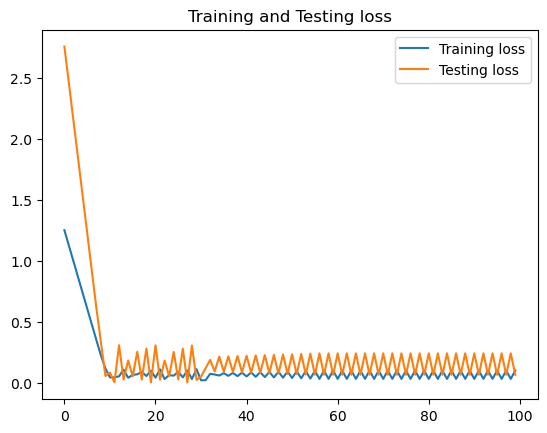

In [85]:
# Line plot of training and testing loss
plt.plot(epoch_count, train_loss, label='Training loss')
plt.plot(epoch_count, test_loss, label='Testing loss')
plt.legend()
plt.title('Training and Testing loss')
plt.show()

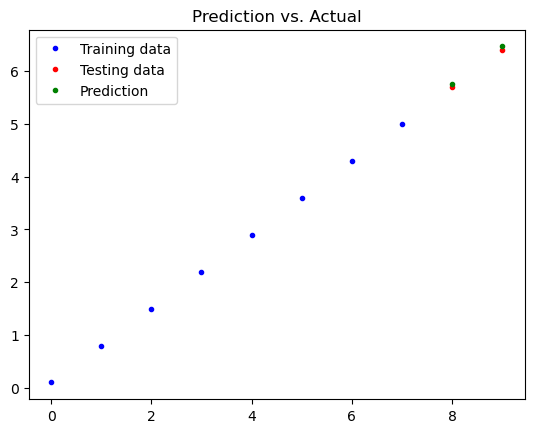

In [86]:
plt.plot(X_train, y_train, '.', label='Training data', color='blue')
plt.plot(X_test, y_test, '.', label='Testing data', color='red')
plt.plot(X_test, y_pred_new.detach().numpy(), '.',  label='Prediction', color='green',)
plt.legend()
plt.title("Prediction vs. Actual")
plt.show()

In [90]:
# Save the model
torch.save(model_0.state_dict(), 'models/linear_model.pth')

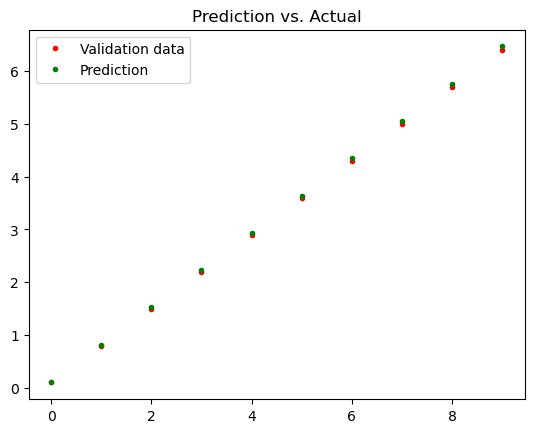

In [92]:
# Load the saved model
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load('models/linear_model.pth'))
                        
# Predict on validation data(First create the validation data)
X_val = torch.arange(10).float()
y_val = weight * X_val + bias

# Make prediction
y_val_pred = model_1(X_val)

# Plot the prediction
plt.plot(X_val, y_val, '.', label='Validation data', color='red')
plt.plot(X_val, y_val_pred.detach().numpy(), '.', label='Prediction', color='green')
plt.legend()
plt.title("Prediction vs. Actual")
plt.show()


## Email Spam Classification

In [137]:
import pandas as pd

df = pd.read_csv('dataset\spam_ham_dataset.csv',usecols=['label','text','label_num'])
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [138]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [139]:
print(df.iloc[0]['text'])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [140]:
print(df.iloc[3]['text'])

Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin



In [143]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label_num']

# Train Test and Val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3308,)
X_val shape:  (828,)
X_test shape:  (1035,)
y_train shape:  (3308,)
y_val shape:  (828,)
y_test shape:  (1035,)


In [144]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)

In [145]:
X_train[1].toarray().shape

(1, 39700)

In [146]:
vectorizer.get_feature_names_out()[:100]

array(['00', '000', '0000', '000000', '000000000049773', '000080',
       '000099', '00018', '0004', '0005', '0008', '001', '0010', '001001',
       '0012', '001452', '002', '0022', '00221', '0025', '0027', '00298',
       '003', '0030', '003002', '0031', '0033', '0038', '004', '0042',
       '0043', '0044', '0045', '0046', '0049', '005', '0051', '006',
       '006600', '0067', '007', '0071', '0074', '008', '0080', '009',
       '0090', '01', '010', '0100', '0101', '011', '012', '012603', '013',
       '0130', '014', '01405', '01408304990', '01474', '015', '016',
       '0170', '0182', '0184', '019017', '01915', '02', '020', '0200',
       '02010207', '021', '022', '0232', '024', '025', '025648', '026',
       '027', '028', '02897893', '029', '03', '030', '0300', '03090806',
       '031', '03149', '0324', '0325567', '033', '0331', '034', '0347',
       '035', '0357', '036', '0363', '036474336', '037'], dtype=object)

In [147]:
X_train.shape

(3308, 39700)

In [148]:
class SpamHamClassifier(nn.Module):
    def __init__(self):
        super(SpamHamClassifier, self).__init__()
        self.linear = nn.Linear(in_features=X_train.shape[1], out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(self.linear(x))

model = SpamHamClassifier()

In [149]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0028, -0.0034,  0.0024,  ..., -0.0050,  0.0035,  0.0032]])),
             ('linear.bias', tensor([-0.0030]))])

In [150]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [151]:
type(X_train)

X_train = torch.tensor(X_train.toarray()).float()
X_test = torch.tensor(X_test.toarray()).float()
X_val = torch.tensor(X_val.toarray()).float()

In [152]:
# Set the random seed for reproducibility
torch.manual_seed(42)

train_loss = []
test_loss = []

epochs = 100

for epoch in range(epochs):
    # Training
    model.train()

    # Forward pass
    y_train_pred = model(X_train)

    # Convert y_train to a tensor
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

    # Calculate the loss
    loss = loss_fn(y_train_pred, y_train_tensor)

    # Zero all the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

    with torch.inference_mode():
        # Test
        model.eval()

        # Forward pass
        y_test_pred = model(X_test)

        # Convert y_test to a tensor
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

        # Calculate the loss
        test_loss.append(loss_fn(y_test_pred, y_test_tensor).item())
        train_loss.append(loss.item())
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss: {loss.item()}, Testing loss: {test_loss[-1]}")
        print("\n")

Epoch 0, Training loss: 0.6950510740280151, Testing loss: 0.6541847586631775


Epoch 10, Training loss: 0.44216686487197876, Testing loss: 0.4579259753227234


Epoch 20, Training loss: 0.3385421931743622, Testing loss: 0.37284231185913086


Epoch 30, Training loss: 0.278394490480423, Testing loss: 0.3229508101940155


Epoch 40, Training loss: 0.23846390843391418, Testing loss: 0.2902570366859436


Epoch 50, Training loss: 0.20983141660690308, Testing loss: 0.2668422758579254


Epoch 60, Training loss: 0.1880607306957245, Testing loss: 0.24887940287590027


Epoch 70, Training loss: 0.1707608550786972, Testing loss: 0.2345251441001892


Epoch 80, Training loss: 0.15656906366348267, Testing loss: 0.22274591028690338


Epoch 90, Training loss: 0.14465519785881042, Testing loss: 0.21286718547344208




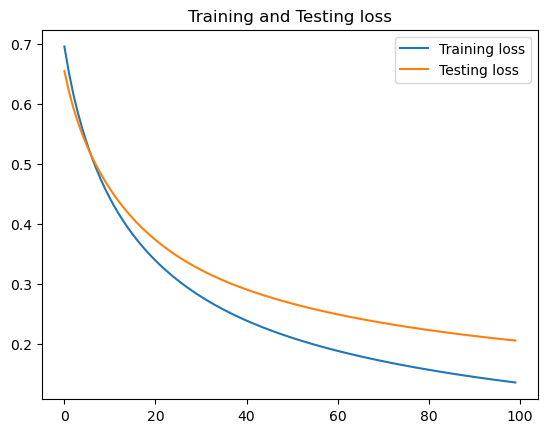

In [153]:
# Line plot of training and testing loss
plt.plot(range(epochs), train_loss, label='Training loss')
plt.plot(range(epochs), test_loss, label='Testing loss')
plt.legend()
plt.title('Training and Testing loss')
plt.show()


In [157]:
# Make prediction on val data

model.eval()

with torch.inference_mode():
    y_val_pred = model(X_val)


In [158]:
y_val_pred

tensor([[4.8048e-02],
        [7.4263e-01],
        [2.4223e-01],
        [2.3874e-05],
        [5.9358e-03],
        [1.7557e-01],
        [5.0960e-02],
        [6.3086e-01],
        [8.0925e-04],
        [2.5876e-01],
        [7.9186e-02],
        [1.0318e-01],
        [2.3772e-04],
        [7.0774e-01],
        [2.3584e-02],
        [5.5409e-01],
        [3.7641e-02],
        [5.0846e-02],
        [5.9157e-01],
        [7.8751e-01],
        [9.1981e-07],
        [1.7010e-06],
        [8.6332e-01],
        [8.8977e-01],
        [9.7976e-01],
        [1.3542e-01],
        [1.0078e-02],
        [2.8985e-01],
        [1.9634e-01],
        [5.2976e-01],
        [2.1659e-01],
        [1.7081e-01],
        [9.5747e-01],
        [1.8590e-01],
        [2.0911e-02],
        [8.6111e-01],
        [8.5395e-02],
        [3.5725e-01],
        [6.0197e-02],
        [1.5814e-01],
        [5.2411e-01],
        [9.3598e-04],
        [2.1466e-01],
        [8.4019e-01],
        [2.6801e-01],
        [1

In [159]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix

y_val_pred = y_val_pred.detach().numpy()
y_val_pred = np.where(y_val_pred > 0.5, 1, 0)
confusion_matrix(y_val, y_val_pred)

array([[584,   3],
       [ 25, 216]], dtype=int64)

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred)

0.966183574879227

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       587
           1       0.99      0.90      0.94       241

    accuracy                           0.97       828
   macro avg       0.97      0.95      0.96       828
weighted avg       0.97      0.97      0.97       828



In [162]:
# Save the model
torch.save(model.state_dict(), 'models/spam_ham_classifier.pth')

In [163]:
# Load the saved model
model = SpamHamClassifier()
model.load_state_dict(torch.load('models/spam_ham_classifier.pth'))

test_email = "Congratulations! You have won a free trip to Hawaii. Click here to claim your prize."

test_email = vectorizer.transform([test_email])
test_email = torch.tensor(test_email.toarray()).float()
prediction = model(test_email)
prediction = prediction.detach().numpy()
prediction = np.where(prediction > 0.5, 1, 0)
print("Spam" if prediction[0][0] == 1 else "Ham")

Spam


In [164]:
test_email = "Hey, how are you doing? Let's catch up soon."
test_email = vectorizer.transform([test_email])
test_email = torch.tensor(test_email.toarray()).float()
prediction = model(test_email)
prediction = prediction.detach().numpy()
prediction = np.where(prediction > 0.5 , 1 , 0)
print("Spam" if prediction[0][0] == 1 else "Ham")

Ham


In [166]:
test_email = """
Big Apple, Bigger AI: Catch Up On All the News From RAG ++ NYC
Welcome to AI++. You may know this newsletter by its old name—News You Can Use. We've got a new name, but it’s still the same email. Well, not quite the same. In each issue, we feature the latest and greatest AI news, tutorials, and insights. We have a whole lot of stuff to cover. So, let’s get right to it.

 The Headlines

Big News From The Big Apple: Unpacking RAG++ NYC
That was a whirlwind. At RAG++ in NYC we announced a ton of new integrations, partnerships, and tools that developers can use to build apps faster and focus on their creativity. Here are the big ships you might have missed:

DataStax Langflow API Is In Public Preview
Wherever you’re building, the DataStax Langflow API is never too far. With one HTTP call to a DataStax-hosted API endpoint, you can tag Langflow into your app and put it to work.

Two New Integrations Hot Off The Presses: Unstructured.io and Glean
There are two questions developers might ask themselves when building enterprise-grade AI apps: 1. Why do I have to format all of this data just so my database will accept it? 2. Why can’t I just ask my database a question? Well, our new integration with Unstructured.io helps you drastically simplify the document ingestion process so you can save time and stress less. And, our integration with Glean gives you the power to ask your database questions, and get answers in plain language. Pretty cool, right? We think so.

More cool AI development and stories await at RAG++ London on 24 September. Space is limited, so request to join today to secure your spot.

AI Joins the Fight Against Climate Change
Climate change is an existential threat to all of us. But, it’s a day-to-day problem for farmers. Now, one AI-company is helping farmers get the most out of their crop yields and use their water efficiently. Read about SupPlant’s work here.

GenAI 101 Is Now In Session
If you’ve got development chops, but you’re new to all things RAG and GenAI, no problem. This primer will help you get on the right path. Learn how to master the basics of GenAI development, and build an app yourself here.

Hunting Down a Song with AI
We hear a lot about AI changing the future, but what about right now? Right now, you might be humming some song that you can’t remember the title of. How can AI help you find the answer? Well, we’ve got a tutorial for you.



 Coming Soon

Infobip Shift | Sept 15-17 | Zadar, Croatia
Infobip Shift returns to Croatia, bringing together the global tech community once more. Join us as we connect, innovate, and explore the future of code together.

RAG + AI Happy Hour | Sept 17 | Seattle
Join DataStax and Unstructured for a fun AI happy hour. Celebrate the end of summer with fellow AI developers and talk about the latest and greatest in building apps using RAG. ⇢ RSVP here.

Big Data London | Sept 18-19
The two day event is a hub for the Data Community to learn and share best practice, build relationships and find the tools needed to develop an effective data-driven business. 

Replay Conference | Sept 18-20 | Seattle
Temporal brings back this 3-day conference for its third year to gather thought leaders and backend engineers to share insights and best practices focused on durable execution.

GenAI Meetup & RAG Workshop - Oktoberfest Edition | Sept 26 | Munich
Join us in Munich for an exclusive full day, dual-track event with Microsoft tailored for IT/AI professionals and developers, culminating in an afternoon of Oktoberfest networking.⇢ Book your ticket here.

AI PaaS, the New Way to Deliver GenAI Apps 100x Quicker | Oct 10 | Sydney
Come meet the DataStax team in Sydney and learn all about how AI Platform as a Service can help you get to production, fast. Create smart, high-growth AI applications at unlimited scale, on any cloud or infrastructure. ⇢ Save your seat.

  Livestreams

Reading through a tutorial is one thing. Watching someone build an app live is another. We learn a lot by watching someone live code, troubleshoot, and rundown the ins and outs of niche development topics. This month, you have more than your fair share of opportunities to check out livestreams to help you level up your AI app-building skills.

Unstructured & DataStax | Sept 19 @ 10 am PT
How do you easily tap into unimaginable large troves of data, spread across multiple data sources and formats? Join DataStax and the Unstructured team to learn how we can help get your unstructured data ready to use in your AI-enabled applications. ⇢ RSVP here.

Learn How to Build an AI Chatbot | Sept 25 @ 10 am PT
Follow along as Amplience and DataStax show you how to leverage large amounts of data to create an AI-driven shopping assistant. Learn to ingest product data with Langflow, and build a simple chat interface that conversationally finds products to add to your shopping cart!⇢ Register here.

GenAI 101: Getting Started With a Vector Database | Oct 2 @ 10 am PT
Get introduced to the basics of using a vector database with Astra DB. We’ll walk through the Generative AI data flow, from creating vector embeddings to storing and querying data efficiently. Join us to learn how Astra DB can power your AI-driven applications.⇢ Dive in here.

Level up your Chatbot with Graph RAG & LangChain | Oct 9 @ 10 am PT
You've built a GenAI Chatbot with RAG, but how do you get it to answer more complex questions? Improve complexity, reduce hallucinations, and enhance your chatbot intelligence with Graph RAG.⇢ Make your chatbot smarter here.

 Thanks!

If you dig this email, feel free to share it far and wide. Update your email preferences and subscribe to make sure you don't miss one of these updates, or opt-out if you prefer not to receive them.

"""
test_email = vectorizer.transform([test_email])
test_email = torch.tensor(test_email.toarray()).float()
prediction = model(test_email)
prediction = prediction.detach().numpy()
print("Prediction: ", prediction)
prediction = np.where(prediction > 0.5 , 1 , 0)
print("Spam" if prediction[0][0] == 1 else "Ham")

Prediction:  [[0.93860894]]
Spam
